Current Working Directory: c:\Users\Nicholas Bing\Documents\App_logs_anomaly_detection\notebooks
Missing values in training data:
0       0
1     400
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
dtype: int64
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       190
           1       1.00      0.90      0.95        10

    accuracy                           0.99       200
   macro avg       1.00      0.95      0.97       200
weighted avg       1.00      0.99      0.99       200



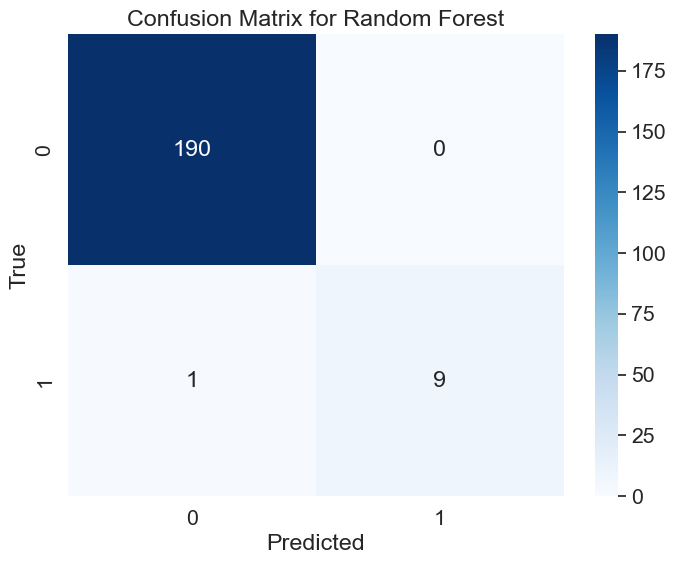

Epoch 1/10
25/25 [==============================] - 1s 3ms/step - loss: 0.5816 - accuracy: 0.7638
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 0.3795 - accuracy: 0.9463
Epoch 3/10
25/25 [==============================] - 0s 3ms/step - loss: 0.2704 - accuracy: 0.9500
Epoch 4/10
25/25 [==============================] - 0s 4ms/step - loss: 0.2133 - accuracy: 0.9500
Epoch 5/10
25/25 [==============================] - 0s 8ms/step - loss: 0.1828 - accuracy: 0.9500
Epoch 6/10
25/25 [==============================] - 0s 5ms/step - loss: 0.1650 - accuracy: 0.9500
Epoch 7/10
25/25 [==============================] - 0s 7ms/step - loss: 0.1525 - accuracy: 0.9500
Epoch 8/10
25/25 [==============================] - 0s 5ms/step - loss: 0.1431 - accuracy: 0.9500
Epoch 9/10
25/25 [==============================] - 0s 5ms/step - loss: 0.1350 - accuracy: 0.9500
Epoch 10/10
7/7 [==============================] - 0s 2ms/step - loss: 0.1235 - accuracy: 0.9500
Neural Network Loss: 

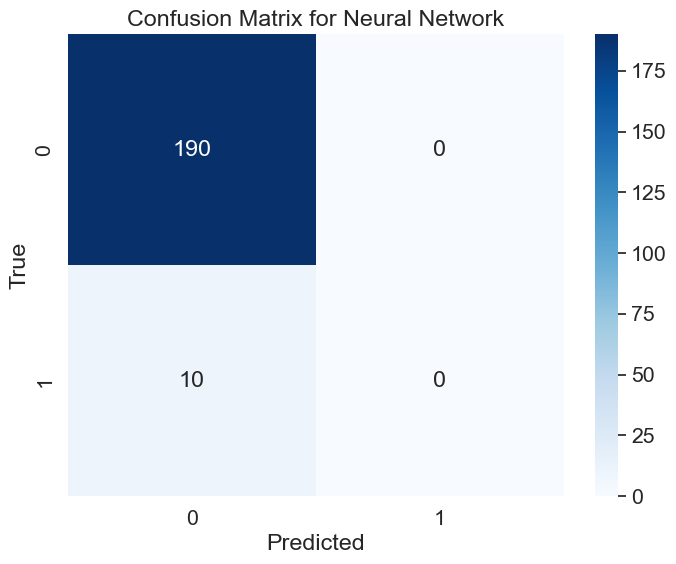

In [1]:
import sys
import os
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
from sklearn.impute import SimpleImputer

def load_module(module_name, path):
    """Dynamically load a module from a given path."""
    import importlib.util
    try:
        spec = importlib.util.spec_from_file_location(module_name, path)
        module = importlib.util.module_from_spec(spec)
        spec.loader.exec_module(module)
        return module
    except FileNotFoundError:
        raise FileNotFoundError(f"No such file: '{path}'")
    except Exception as e:
        print(f"Error loading module {module_name}: {e}")
        raise

# Print the current working directory for debugging
print("Current Working Directory:", os.getcwd())

# Construct the path to model.py
model_path = os.path.join(os.getcwd(), '..', 'scripts', 'model.py')

# Load the module dynamically
try:
    model_module = load_module("model", model_path)
except Exception as e:
    print(f"Failed to load model module: {e}")
    sys.exit(1)

# Access the classes
RandomForestModel = model_module.RandomForestModel
NeuralNetworkModel = model_module.NeuralNetworkModel

# Load preprocessed data
X_train = pd.read_csv('../data/processed/X_train.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')
y_train = pd.read_csv('../data/processed/y_train.csv').squeeze()
y_test = pd.read_csv('../data/processed/y_test.csv').squeeze()

# Check for missing values in the training data
print("Missing values in training data:")
print(X_train.isnull().sum())

# Handle missing values
imputer = SimpleImputer(strategy='mean')  # Choose your strategy
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Train and evaluate Random Forest Model
rf_model = RandomForestModel()
rf_model.train(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Random Forest Evaluation
print("Random Forest Classification Report:")
print(rf_model.evaluate(y_test, y_pred_rf))

# Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Train and evaluate Neural Network Model
nn_model = NeuralNetworkModel(input_shape=X_train.shape[1])
nn_model.compile()
nn_model.train(X_train, y_train, epochs=10, batch_size=32)

# Evaluate Neural Network
loss, accuracy = nn_model.evaluate(X_test, y_test)
print(f'Neural Network Loss: {loss}, Accuracy: {accuracy}')

# Predictions
y_pred_nn = (nn_model.model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix for Neural Network
plt.figure(figsize=(8, 6))
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Neural Network')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()